## Observations and Insights 

In [220]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata, study_results, how='outer', on='Mouse ID')
# Display the data table for preview
combined_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
num_mice = combined_df["Mouse ID"].nunique()
num_mice

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_mice_ID = combined_df.loc[combined_df.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
dup_mice_ID

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 



In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data_df = combined_df[combined_df["Mouse ID"].isin(dup_mice_ID)==False]
clean_data_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_num_mice = combined_df["Mouse ID"].nunique()
clean_num_mice

249

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
mean = clean_data_df['Tumor Volume (mm3)'].groupby(clean_data_df['Drug Regimen']).mean()
median = clean_data_df['Tumor Volume (mm3)'].groupby(clean_data_df['Drug Regimen']).median()
var = clean_data_df['Tumor Volume (mm3)'].groupby(clean_data_df['Drug Regimen']).var()
std = clean_data_df['Tumor Volume (mm3)'].groupby(clean_data_df['Drug Regimen']).std()
sem= clean_data_df['Tumor Volume (mm3)'].groupby(clean_data_df['Drug Regimen']).sem()
summary_stat = pd.DataFrame({"mean":mean, "median":median, "var":var, 
                           "sem":sem})
summary_stat

,mean,median,var,sem
Drug Regimen,,,,
Capomulin,40.675741,41.557809,24.947764,0.329346
Ceftamin,52.591172,51.776157,39.290177,0.469821
Infubinol,52.884795,51.820584,43.128684,0.492236
Ketapril,55.235638,53.698743,68.553577,0.603860
Naftisol,54.331565,52.509285,66.173479,0.596466
Placebo,54.033581,52.288934,61.168083,0.581331
Propriva,52.320930,50.446266,43.852013,0.544332
Ramicane,40.216745,40.673236,23.486704,0.320955
Stelasyn,54.233149,52.431737,59.450562,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
summ_agg = clean_data_df.groupby(['Drug Regimen']) [['Tumor Volume (mm3)']].agg(['mean', 'median', 'var'
                                                                                , 'std', 'sem'])
summ_agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

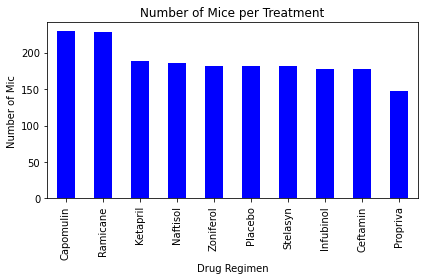

In [9]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
mice_count = clean_data_df['Drug Regimen'].value_counts()
mice_count
bar_plot = mice_count.plot(kind='bar', color='blue', title="Number of Mice per Treatment", xlabel="Drug Regimen"
                          , ylabel="Number of Mic")
plt.tight_layout()
plt.show()

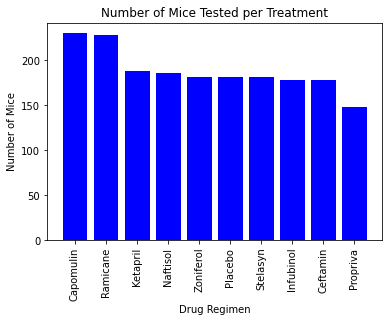

In [10]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
x_axis = mice_count.index.values
y_axis = mice_count.values
plt.bar(x_axis, y_axis, color="b", align="center")

plt.title("Number of Mice Tested per Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.xticks(rotation="vertical")
plt.tight_layout
plt.show()


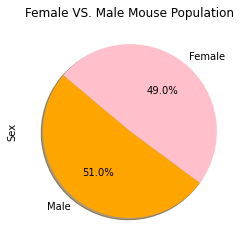

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_data = clean_data_df["Sex"].value_counts()
gender_data.plot.pie(title="Female VS. Male Mouse Population", colors=['orange', 'pink'], shadow=True, autopct= "%1.1f%%", startangle=140)
plt.show()

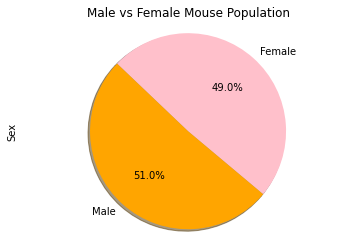

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender = ['Female', 'Male']
sizes = ['49.0', '51.0']
plt.pie(sizes, labels=gender, colors=['pink', 'orange'], autopct="%1.1f%%", shadow=True, startangle=320)
plt.title("Male vs Female Mouse Population")
plt.axis("equal")
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [167]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
max_timepoint_df = pd.DataFrame(clean_data_df.groupby('Mouse ID')['Timepoint'].max().sort_values()).reset_index().rename(columns={'Timepoint': 'max_timepoint'})
max_timepoint_df


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_df = pd.merge(clean_data_df, max_timepoint_df, on='Mouse ID')
merged_df.head(-1)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,max_timepoint
0,k403,Ramicane,Male,21,16,0,45.000000,0,45
1,k403,Ramicane,Male,21,16,5,38.825898,0,45
2,k403,Ramicane,Male,21,16,10,35.014271,1,45
3,k403,Ramicane,Male,21,16,15,34.223992,1,45
4,k403,Ramicane,Male,21,16,20,32.997729,1,45
...,...,...,...,...,...,...,...,...,...
1874,z969,Naftisol,Male,9,30,20,57.898778,2,45
1875,z969,Naftisol,Male,9,30,25,63.145652,2,45
1876,z969,Naftisol,Male,9,30,30,65.841013,3,45
1877,z969,Naftisol,Male,9,30,35,69.176246,4,45


In [182]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

#Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

for treatment in treatments:
    drug_df = merged_df.loc[merged_df['Drug Regimen'] == treatment]
    final_volume_df = drug_df.loc[drug_df['Timepoint'] == drug_df['max_timepoint']]
    values = final_volume_df['Tumor Volume (mm3)']
    tumor_vol_data.append(values)
    
    #Determine outliers using upper and lower bounds
    quartiles = values.quantile([.25, .5, .75])
    lowerq = quartiles[.25]
    upperq = quartiles[.75]
    iqr = (upperq - lowerq).round(2)
    lower_bound = (lowerq - (1.5*iqr)).round(2)
    upper_bound = (upperq + (1.5*iqr)).round(2)
    outliers_count = (values.loc[(final_volume_df['Tumor Volume (mm3)'] >= upper_bound) | (final_volume_df['Tumor Volume (mm3)'] <= lower_bound)]).count()
    
    print(f'IQR for {treatment}: {iqr}')
    print(f'Lower Bound for {treatment}: {lower_bound}')
    print(f'Upper Bound for {treatment}: {upper_bound}')
    print(f'Number of {treatment} outliers: {outliers_count}')

IQR for Capomulin: 7.78
Lower Bound for Capomulin: 20.71
Upper Bound for Capomulin: 51.83
Number of Capomulin outliers: 0
IQR for Ramicane: 9.1
Lower Bound for Ramicane: 17.91
Upper Bound for Ramicane: 54.31
Number of Ramicane outliers: 0
IQR for Infubinol: 11.48
Lower Bound for Infubinol: 36.83
Upper Bound for Infubinol: 82.75
Number of Infubinol outliers: 1
IQR for Ceftamin: 15.58
Lower Bound for Ceftamin: 25.35
Upper Bound for Ceftamin: 87.67
Number of Ceftamin outliers: 0


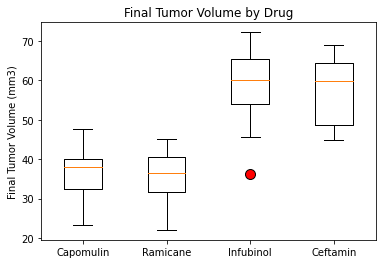

In [190]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
flierprops = dict(marker='o', markerfacecolor='r', markersize=10, markeredgecolor='black')
plt.boxplot(tumor_vol_data, flierprops=flierprops)
plt.title('Final Tumor Volume by Drug')
plt.ylabel('Final Tumor Volume (mm3)')
plt.xticks([1, 2, 3, 4], ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])

plt.show()

## Line and Scatter Plots

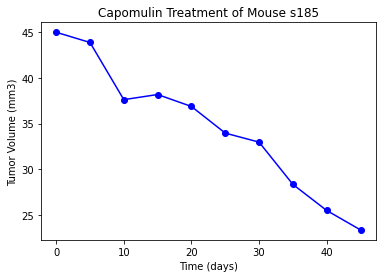

In [191]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

# find a mouse treated with Capomulin
merged_df.loc[merged_df['Drug Regimen'] == 'Capomulin'].head(10)
mouse = merged_df.loc[merged_df['Mouse ID'] == 's185']

# plot chart
plt.plot(mouse['Timepoint'], mouse['Tumor Volume (mm3)'], marker='o', color = 'b')

plt.xlabel("Time (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment of Mouse s185")

plt.show()


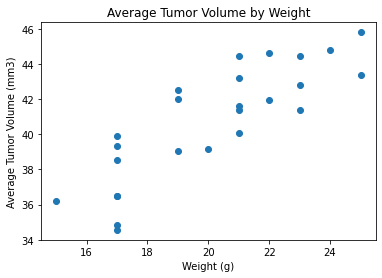

In [200]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

capomulin_df = combined_df.loc[combined_df['Drug Regimen'] == 'Capomulin']

#Find Average Tumor volume for each mouse
avg_vol = pd.DataFrame(capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()).reset_index().rename(columns={'Tumor Volume (mm3)': 'avg_tumor_vol'})
avg_vol_df = pd.merge(capomulin_df, avg_vol, on='Mouse ID')
final_avg_vol_df = avg_vol_df[['Weight (g)', 'avg_tumor_vol']].drop_duplicates()

x_data = final_avg_vol_df['Weight (g)']
y_data = final_avg_vol_df['avg_tumor_vol']

# scatter plot
plt.scatter(x_data, y_data)

plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title('Average Tumor Volume by Weight')

plt.show()


## Correlation and Regression

The correlation between weight and average tumor volume for Capomulin regimen is 0.84


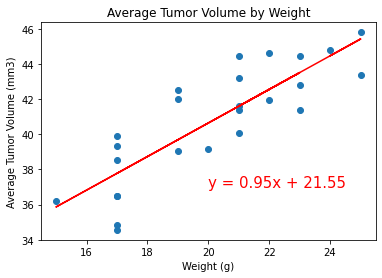

In [221]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation_coef = st.pearsonr(x_data, y_data)
print(f'The correlation between weight and average tumor volume for Capomulin regimen is {round(correlation_coef[0],2)}')

# Calculate linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_data, y_data)
regress_values = x_data * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_data, y_data)
plt.plot(x_data, regress_values, 'r-')

plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title('Average Tumor Volume by Weight')

# Annotate linear regression
plt.annotate(line_eq,(20,37),fontsize=15,color="red")

plt.show()
